In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

# Load results

In [228]:
def load_data(name):
    results = dict()
    results["K"] = np.load("results/" + name + "/K.npy")

    results["mae_userknn"] = np.load("results/" + name + "/mae_userknn.npy")
    results["mae_pop"] = np.load("results/" + name + "/mae_pop.npy")
    results["mae_gain"] = np.load("results/" + name + "/mae_gain.npy")
    results["mae_userknn_reuse"] = np.load("results/" + name + "/mae_userknn_reuse.npy")
    results["mae_pop_reuse"] = np.load("results/" + name + "/mae_pop_reuse.npy")
    results["mae_gain_reuse"] = np.load("results/" + name + "/mae_gain_reuse.npy")

    results["deg_userknn"] = np.load("results/" + name + "/deg_userknn.npy")
    results["deg_pop"] = np.load("results/" + name + "/deg_pop.npy")
    results["deg_gain"] = np.load("results/" + name + "/deg_gain.npy")
    results["deg_userknn_reuse"] = np.load("results/" + name + "/deg_userknn_reuse.npy")
    results["deg_pop_reuse"] = np.load("results/" + name + "/deg_pop_reuse.npy")
    results["deg_gain_reuse"] = np.load("results/" + name + "/deg_gain_reuse.npy")

    results["skew_userknn"] = np.load("results/" + name + "/skew_userknn.npy")
    results["skew_pop"] = np.load("results/" + name + "/skew_pop.npy")
    results["skew_gain"] = np.load("results/" + name + "/skew_gain.npy")
    results["skew_userknn_reuse"] = np.load("results/" + name + "/skew_userknn_reuse.npy")
    results["skew_pop_reuse"] = np.load("results/" + name + "/skew_pop_reuse.npy")
    results["skew_gain_reuse"] = np.load("results/" + name + "/skew_gain_reuse.npy")
    
    nmentors = pickle.load(open("results/" + name + "/nr_of_mentors.pkl", "rb"))
    results["nmentors_userknn"] = nmentors["UserKNN"]
    results["nmentors_userknn_reuse"] = nmentors["UserKNN + Reuse"]
    results["nmentors_pop"] = nmentors["Popularity"]
    results["nmentors_pop_reuse"] = nmentors["Popularity + Reuse"]
    results["nmentors_gain"] = nmentors["Gain"]
    results["nmentors_gain_reuse"] = nmentors["Gain + Reuse"]
    
    return results

In [229]:
results = load_data("jester")

In [231]:
%matplotlib inline

# Plotting
## nr. of neighbors vs. utility

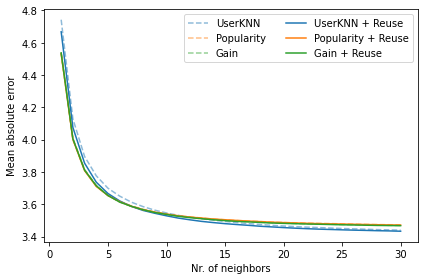

In [232]:
plt.figure(figsize=(6, 4))
plt.plot(results["K"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.xlabel("Nr. of neighbors")
plt.ylabel("Mean absolute error")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/k_vs_mae.png", dpi=300)

## nr. of students vs. utility

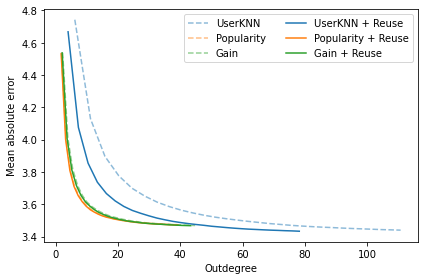

In [233]:
plt.figure(figsize=(6, 4))
plt.plot(results["deg_userknn"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["deg_pop"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["deg_gain"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["deg_userknn_reuse"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["deg_pop_reuse"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["deg_gain_reuse"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Mean absolute error")
plt.xlabel("Outdegree")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/outdegree_vs_mae.png", dpi=300)

## skew coefficient vs. nr. of neighbors

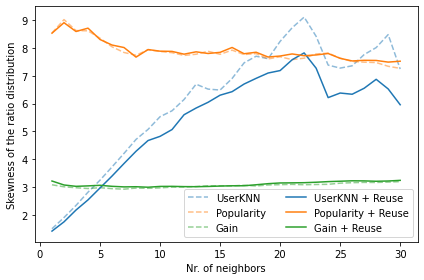

In [234]:
plt.figure(figsize=(6, 4))
plt.plot(results["K"], results["skew_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["skew_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["skew_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["skew_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["skew_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["skew_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Skewness of the ratio distribution")
plt.xlabel("Nr. of neighbors")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/skew_vs_k.png", dpi=300)

## nr. of students vs. utility overall

In [235]:
ml100k_results = load_data("ml-100k")
ml1m_results = load_data("ml-1m")
jester_results = load_data("jester")
goodreads_results = load_data("goodreads")

In [236]:
def plot_acc_deg(ax, results):
    ax.plot(results["deg_userknn"], results["mae_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["deg_pop"], results["mae_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["deg_gain"], results["mae_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["deg_userknn_reuse"], results["mae_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["deg_pop_reuse"], results["mae_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["deg_gain_reuse"], results["mae_gain_reuse"], color="C2", linestyle="solid")

def plot_nrmentors(ax, results):
    ax.plot(results["nmentors_userknn"][:100], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["nmentors_pop"][:100], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["nmentors_gain"][:100], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["nmentors_userknn_reuse"][:100], color="C0", linestyle="solid")
    ax.plot(results["nmentors_pop_reuse"][:100], color="C1", linestyle="solid")
    ax.plot(results["nmentors_gain_reuse"][:100], color="C2", linestyle="solid")

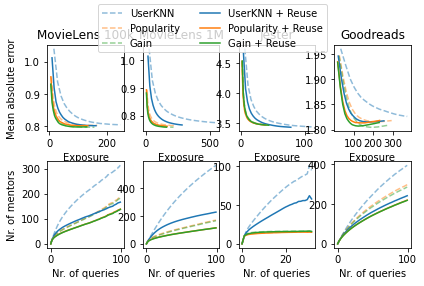

In [237]:
fig, axes = plt.subplots(2, 4)

plot_acc_deg(axes[0, 0], ml100k_results)
plot_acc_deg(axes[0, 1], ml1m_results)
plot_acc_deg(axes[0, 2], jester_results)
plot_acc_deg(axes[0, 3], goodreads_results)
axes[0, 0].set_ylabel("Mean absolute error")
axes[0, 0].set_xlabel("Exposure")
axes[0, 0].set_title("MovieLens 100k")
axes[0, 1].set_xlabel("Exposure")
axes[0, 1].set_title("MovieLens 1M")
axes[0, 2].set_xlabel("Exposure")
axes[0, 2].set_title("Jester")
axes[0, 3].set_xlabel("Exposure")
axes[0, 3].set_title("Goodreads")

plot_nrmentors(axes[1, 0], ml100k_results)
plot_nrmentors(axes[1, 1], ml1m_results)
plot_nrmentors(axes[1, 2], jester_results)
plot_nrmentors(axes[1, 3], goodreads_results)
axes[1, 0].set_ylabel("Nr. of mentors")
axes[1, 0].set_xlabel("Nr. of queries")
axes[1, 1].set_xlabel("Nr. of queries")
axes[1, 2].set_xlabel("Nr. of queries")
axes[1, 3].set_xlabel("Nr. of queries")

colors = ['C0', 'C1', 'C2']
colors_reuse = ['C0', 'C1', 'C2']
lines = [Line2D([0], [0], color=c, linestyle='--', alpha=0.5) for c in colors]
lines_reuse = [Line2D([0], [0], color=c) for c in colors+colors_reuse]
labels = ["UserKNN", "Popularity", "Gain"]
labels_reuse = ["UserKNN + Reuse", "Popularity + Reuse", "Gain + Reuse"]

fig.legend(lines+lines_reuse, labels+labels_reuse, ncol=2, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.85, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes[:, 0])
#fig.tight_layout()